# Explore Homfam 

In [75]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import OrderedDict
from Bio import SeqIO


homfam_path_combined = "/home/luisasantus/Desktop/crg_cluster/data/structural_regression/homfam/combinedSeqs"
homfam_path_ref = "/home/luisasantus/Desktop/crg_cluster/data/structural_regression/homfam/refs"


exthomfam_path_combined_v35uniprot = "/home/luisasantus/Desktop/crg_cluster/data/structural_regression/extHomfam/v35-uniprot/"
exthomfam_path_ref_v35uniprot = "/home/luisasantus/Desktop/crg_cluster/data/structural_regression/extHomfam/v35-uniprot/ref"


exthomfam_path_combined_v33ncbi = "/home/luisasantus/Desktop/crg_cluster/data/structural_regression/extHomfam/v33.1-ncbi/"
exthomfam_path_ref_v33ncbi = "/home/luisasantus/Desktop/crg_cluster/data/structural_regression/extHomfam/v33.1-ncbi/ref"


outdir = "../../../data/structural_regression/plots/01_homfam/"

### Order data

In [40]:
def get_stats(f):
    fasta_sequences = SeqIO.parse(open(f),'fasta')

    ls = []
    n_sequences = 0 

    for fasta in fasta_sequences:
        name, sequence = fasta.id, str(fasta.seq)
        n_sequences = n_sequences + 1
        l = len(sequence.replace("-", ""))
        ls.append(l)
    entry = pd.DataFrame({"file": [os.path.basename(f).replace(".fa", "")],
                          "n_sequences": [n_sequences],
                          "mean_length": [np.mean(ls)],
                          "min_length": [np.min(ls)],
                          "max_length": [np.max(ls)]})
    return(entry)

In [41]:
def get_summary_df(homfam_path, subset = ""):
    summary_homfam = pd.DataFrame()
    max_steps = float("Inf")
    i = 0 
    for filename in os.listdir(homfam_path):
        i = i+1
        if(i>max_steps): 
            break
        f = os.path.join(homfam_path, filename)
        # checking if it is a file
        if os.path.isfile(f):
            entry = get_stats(f)
            summary_homfam = summary_homfam.append(entry, ignore_index= True)
    summary_homfam["family"] = summary_homfam.file.str.replace(".ref", "", regex = False)
    summary_homfam["subset"] = subset
    summary_homfam.sort_values(by=['family'])

    column_names = ["family", "subset", "n_sequences","mean_length", "min_length", "max_length", "file"]
    summary_homfam = summary_homfam.reindex(columns=column_names)
    return(summary_homfam)

#### Homfam

In [42]:
summary_homfam_combined = get_summary_df(homfam_path_combined, "combined")
summary_homfam_ref = get_summary_df(homfam_path_ref, "ref")
summary_homfam_combined = summary_homfam_combined.sort_values("n_sequences", ascending=False)

In [43]:
summary_homfam_merged = summary_homfam_ref.merge(summary_homfam_combined,on='family')
summary_homfam_merged["perc_ref_total"] = (summary_homfam_merged.n_sequences_x * 100)/(summary_homfam_merged.n_sequences_y)

In [44]:
summary_homfam_merged.head(2)

,family,subset_x,n_sequences_x,mean_length_x,min_length_x,max_length_x,file_x,subset_y,n_sequences_y,mean_length_y,min_length_y,max_length_y,file_y,perc_ref_total
0,Stap_Strp_toxin,ref,6,220.333333,190,238,Stap_Strp_toxin.ref,combined,640,87.392188,20,238,Stap_Strp_toxin,0.937500
1,sodfe,ref,8,198.500000,186,205,sodfe.ref,combined,4455,77.447138,17,205,sodfe,0.179574


### ExtHomfam 

In [73]:
def get_extHomfam(exthomfam_path_combined):
    summary_exthomfam_small = get_summary_df(os.path.join(exthomfam_path_combined, "small"), "combined")
    summary_exthomfam_medium = get_summary_df(os.path.join(exthomfam_path_combined, "medium"), "combined")
    summary_exthomfam_large = get_summary_df(os.path.join(exthomfam_path_combined, "large"), "combined")
    summary_exthomfam_xlarge = get_summary_df(os.path.join(exthomfam_path_combined, "xlarge"), "combined")
    summary_exthomfam_huge = get_summary_df(os.path.join(exthomfam_path_combined, "huge"), "combined")
    summary_exthomfam_small["size_group"] = "small"
    summary_exthomfam_medium["size_group"] = "medium"
    summary_exthomfam_large["size_group"] = "large"
    summary_exthomfam_xlarge["size_group"] = "xlarge"
    summary_exthomfam_huge["size_group"] = "huge"
    summary_exthomfam_combined = pd.concat([summary_exthomfam_small, summary_exthomfam_medium, summary_exthomfam_large, summary_exthomfam_xlarge, summary_exthomfam_huge])
    return(summary_exthomfam_combined)

def get_extHomfam_merged(summary_exthomfam_combined, exthomfam_path_ref):
    summary_exthomfam_ref = get_summary_df(exthomfam_path_ref, "ref")
    summary_exthomfam_combined = summary_exthomfam_combined.sort_values("n_sequences", ascending=False)
    summary_exthomfam_merged = summary_exthomfam_ref.merge(summary_exthomfam_combined,on='family')
    summary_exthomfam_merged["perc_ref_total"] = (summary_exthomfam_merged.n_sequences_x * 100)/(summary_exthomfam_merged.n_sequences_y)
    return(summary_exthomfam_merged)

In [74]:
# Load v35-uniprot 
summary_exthomfam_combined_v35uniprot = get_extHomfam(exthomfam_path_combined_v35uniprot)
summary_exthomfam_merged_v35uniprot = get_extHomfam_merged(summary_exthomfam_combined_v35uniprot, exthomfam_path_ref_v35uniprot)

In [76]:
summary_exthomfam_combined_v35uniprot.head()

,family,subset,n_sequences,mean_length,min_length,max_length,file,size_group
0,cbm12,combined,1851,24.632631,17,62,cbm12,small
1,bv,combined,1500,175.394000,48,229,bv,small
2,CBM_20,combined,9636,83.017954,26,118,CBM_20,small
3,ghf11,combined,4041,168.280871,33,230,ghf11,small
4,pot,combined,2194,61.047858,22,82,pot,small


In [78]:
# Load v33-ncbi 
summary_exthomfam_combined_v33ncbi = get_extHomfam(exthomfam_path_combined_v33ncbi)
summary_exthomfam_merged_v33ncbi = get_extHomfam_merged(summary_exthomfam_combined_v33ncbi, exthomfam_path_ref_v33ncbi)

## Comparison homfam and extHomfam

In [79]:
# Prep exthomfam 
def get_size_df(summary_exthomfam_combined, dataset):
    df_size_exthomfam = pd.DataFrame(summary_exthomfam_combined.groupby("size_group").size()).reset_index()
    df_size_exthomfam = df_size_exthomfam.rename(columns={0: "n"})
    df_size_exthomfam["dataset"] = dataset
    df_size_exthomfam['size_group'] = pd.Categorical(
        df_size_exthomfam['size_group'], 
        categories=["small", "medium", "large", "xlarge", "huge"], 
        ordered=True
    )
    return(df_size_exthomfam)

In [88]:
df_size_exthomfam_v35 = get_size_df(summary_exthomfam_combined_v35uniprot, "extHomfam_v35-uniprot")
df_size_exthomfam_v33 = get_size_df(summary_exthomfam_combined_v33ncbi, "extHomfam_v33-ncbi")

In [89]:
df_size_exthomfam_v33

,size_group,n,dataset
0,huge,62,extHomfam_v33-ncbi
1,large,83,extHomfam_v33-ncbi
2,medium,95,extHomfam_v33-ncbi
3,small,85,extHomfam_v33-ncbi
4,xlarge,67,extHomfam_v33-ncbi


In [90]:
# Prep homfam
# Add group sizes
thresholds = [4000,10000,25000,415519]
summary_homfam_combined["size_group"] = "huge"
summary_homfam_combined.loc[summary_homfam_combined.n_sequences < thresholds[3], "size_group"] = "xlarge"
summary_homfam_combined.loc[summary_homfam_combined.n_sequences < thresholds[2], "size_group"] = "large"
summary_homfam_combined.loc[summary_homfam_combined.n_sequences < thresholds[1], "size_group"] = "medium"
summary_homfam_combined.loc[summary_homfam_combined.n_sequences < thresholds[0], "size_group"] = "small"

In [91]:
summary_homfam_combined.head(2)

,family,subset,n_sequences,mean_length,min_length,max_length,file,size_group
69,rvp,combined,93681,94.288554,22,133,rvp,xlarge
87,zf-CCHH,combined,88345,23.251265,12,35,zf-CCHH,xlarge


In [92]:
df_size_homfam = get_size_df(summary_homfam_combined, "homfam")

In [94]:
## Merge
df_size = pd.concat([df_size_homfam, df_size_exthomfam_v33])
df_size = pd.concat([df_size, df_size_exthomfam_v35])
df_size.head(2)

,size_group,n,dataset
0,large,14,homfam
1,medium,21,homfam


## Plot homfam vs extHomfam 

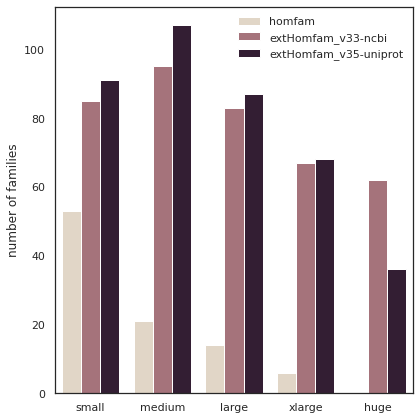

In [96]:
# ------------ Number of sequences -------------

sns.set_theme(style="white")
sns.set_context("notebook")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 6))


# Plot the total crashes
sns.set_color_codes("deep")
sns.barplot(x="size_group", y="n", data=df_size,
            hue="dataset", palette="ch:.25")

# Add a legend and informative axis label
ax.legend(ncol=1, loc="upper right", frameon=False)
ax.set(xlabel="")
ax.set(ylabel="number of families")
#sns.despine(left=True, bottom=True)
f.tight_layout()
plt.savefig(os.path.join(outdir, "00_nFamilies.pdf"))



In [112]:
# ------------ Perc Reference distribution -------------
# Homfam
perc_ref_homfam = summary_homfam_merged[["family", "perc_ref_total"]]
summary_homfam = summary_homfam_combined.merge(perc_ref_homfam, on="family")
# Ext homfam
perc_ref_exthomfam_v33ncbi = summary_exthomfam_merged_v33ncbi[["family", "perc_ref_total"]]
summary_exthomfam_v33ncbi = summary_exthomfam_combined_v33ncbi.merge(perc_ref_exthomfam_v33ncbi, on="family")
# Ext homfam
perc_ref_exthomfam_v35uniprot = summary_exthomfam_merged_v35uniprot[["family", "perc_ref_total"]]
summary_exthomfam_v35uniprot = summary_exthomfam_combined_v35uniprot.merge(perc_ref_exthomfam_v35uniprot, on="family")
#summary comb
summary_homfam["dataset"]="homfam"
summary_exthomfam_v33ncbi["dataset"]="extHomfam_v33-ncbi"
summary_exthomfam_v35uniprot["dataset"]="extHomfam_v35-uniprot"

In [113]:
summary = pd.concat([summary_homfam, summary_exthomfam_v35uniprot])

In [114]:
summary= summary.reset_index()
summary = summary.iloc[: , 1:]

In [115]:
summary.head(2)

,family,subset,n_sequences,mean_length,min_length,max_length,file,size_group,perc_ref_total,dataset
0,rvp,combined,93681,94.288554,22,133,rvp,xlarge,0.006405,homfam
1,zf-CCHH,combined,88345,23.251265,12,35,zf-CCHH,xlarge,0.016979,homfam


## -------------- Save Summary dataframe  --------------

In [116]:
summary.to_csv(os.path.join("/home/luisasantus/Desktop/crg_cluster/data/structural_regression/stats/", "01_summary_homfam_exthomfam.csv"), index = False)

In [117]:
summary.dataset.value_counts()

extHomfam_v35-uniprot    389
homfam                    94
Name: dataset, dtype: int64

## Visualize Homfam 

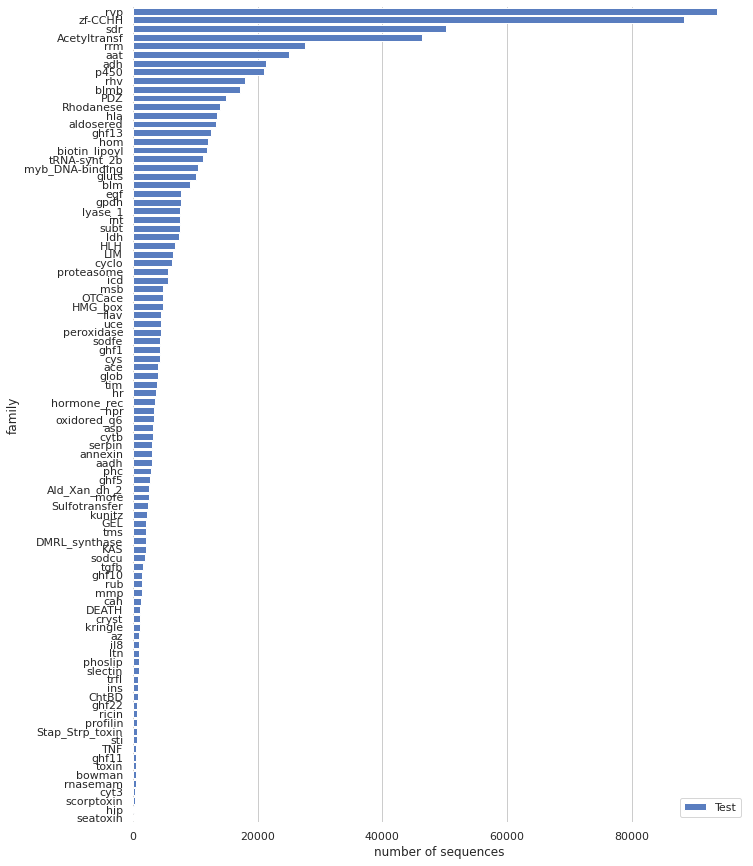

In [57]:
sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(11, 15))


# Plot the total crashes
sns.set_color_codes("pastel")
sns.set_color_codes("muted")
sns.barplot(x="n_sequences", y="family", data=summary_homfam_combined,
            label="Test", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlabel="number of sequences")
sns.despine(left=True, bottom=True)
plt.savefig(os.path.join(outdir, "01_test_seq.pdf"))


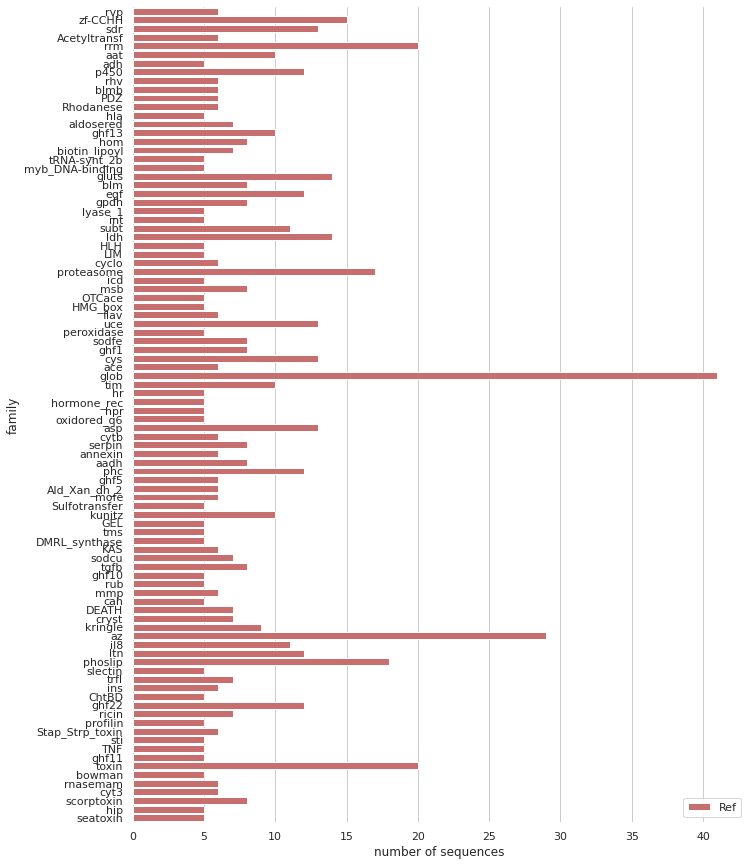

In [59]:
# Order as the one above
order_test =  list(OrderedDict.fromkeys(summary_homfam_combined.family))
order_test
summary_homfam_ref['family'] = pd.Categorical(
    summary_homfam_ref['family'], 
    categories=order_test, 
    ordered=True
)


sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(11, 15))


# Plot the total crashes
sns.set_color_codes("pastel")
sns.set_color_codes("muted")
sns.barplot(x="n_sequences", y="family", data=summary_homfam_ref,
            label="Ref", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlabel="number of sequences")
sns.despine(left=True, bottom=True)
plt.savefig(os.path.join(outdir, "02_refs_seq.pdf"))


In [60]:
summary_homfam_merged.head(2)

,family,subset_x,n_sequences_x,mean_length_x,min_length_x,max_length_x,file_x,subset_y,n_sequences_y,mean_length_y,min_length_y,max_length_y,file_y,perc_ref_total
0,Stap_Strp_toxin,ref,6,220.333333,190,238,Stap_Strp_toxin.ref,combined,640,87.392188,20,238,Stap_Strp_toxin,0.937500
1,sodfe,ref,8,198.500000,186,205,sodfe.ref,combined,4455,77.447138,17,205,sodfe,0.179574


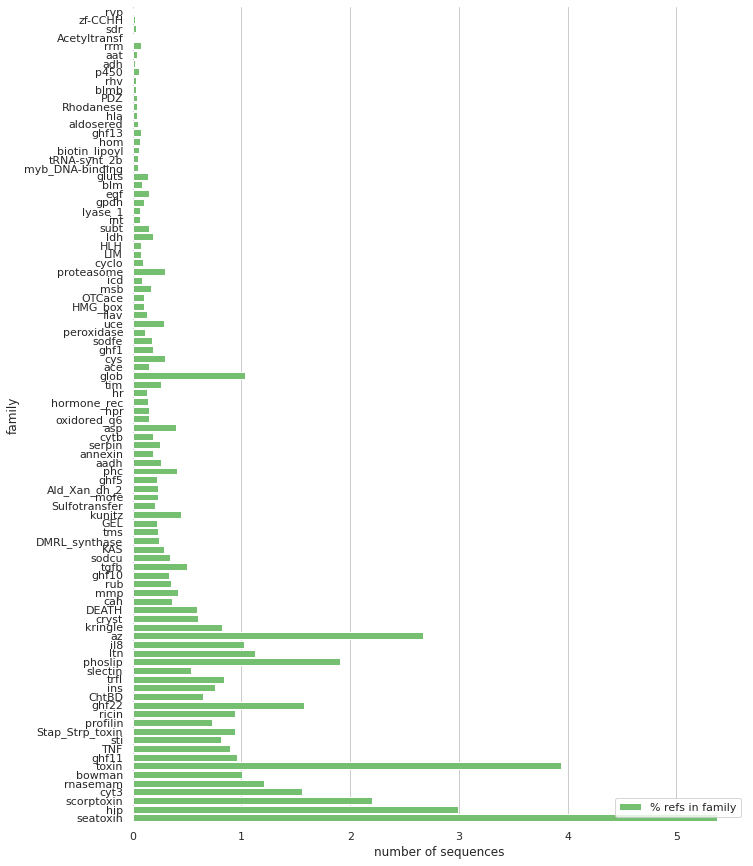

In [61]:
summary_homfam_merged['family'] = pd.Categorical(
    summary_homfam_merged['family'], 
    categories=order_test, 
    ordered=True
)
summary_homfam_merged

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(11, 15))


# Plot the total crashes
sns.set_color_codes("pastel")
sns.set_color_codes("muted")
sns.barplot(x="perc_ref_total", y="family", data=summary_homfam_merged,
            label="% refs in family", color="g")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlabel="number of sequences")
sns.despine(left=True, bottom=True)
plt.savefig(os.path.join(outdir, "03_perc_ref_in_family.pdf"))


## Visualize extrenal Homfam 

In [176]:
summary_exthomfam_combined = summary_exthomfam_combined.sort_values("n_sequences", ascending=False)

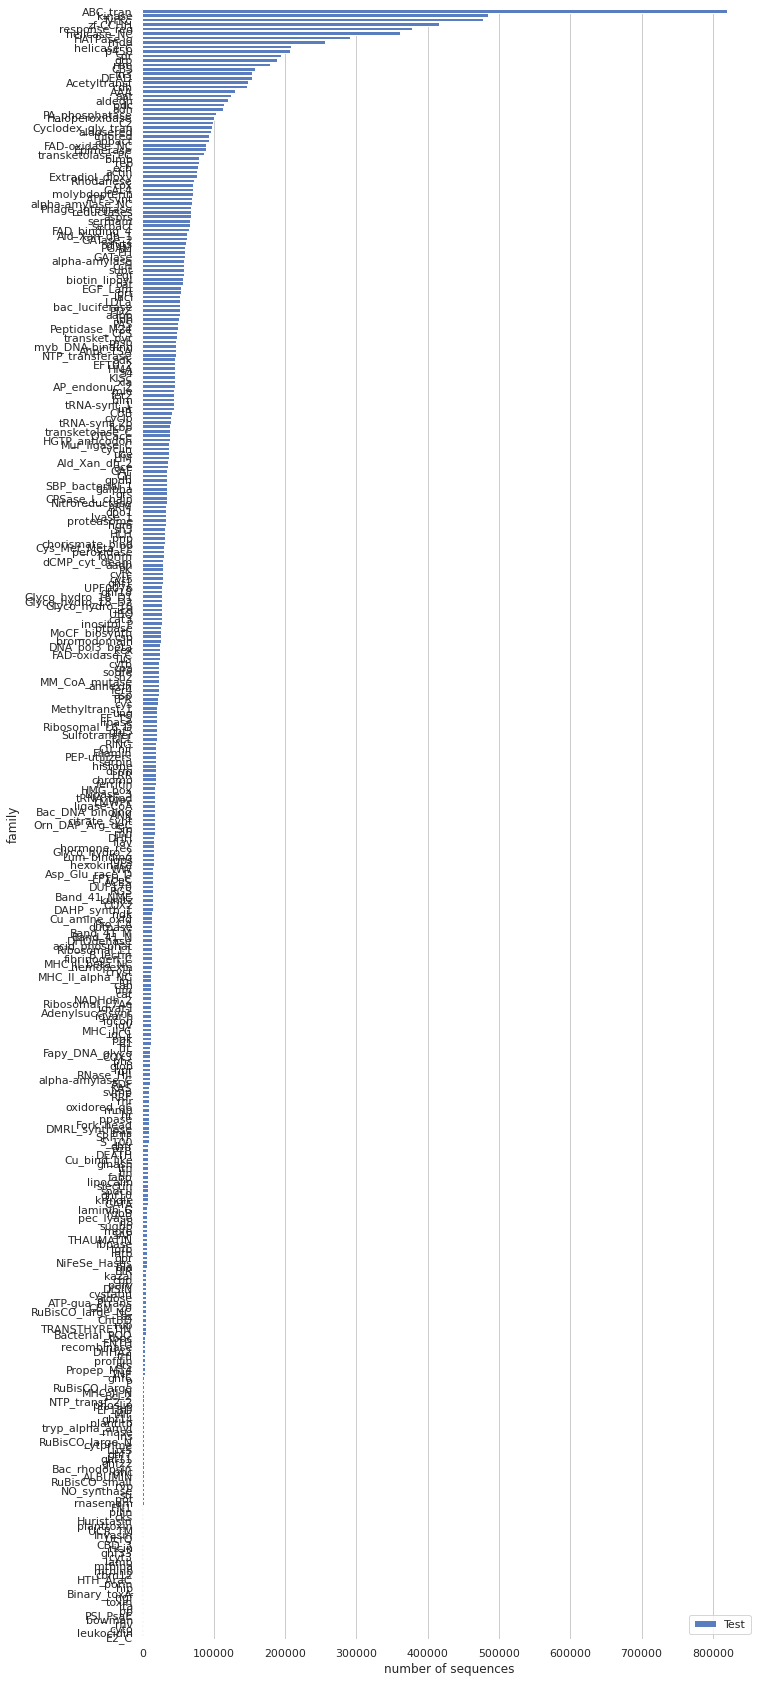

In [177]:
sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(11, 30))


# Plot the total crashes
sns.set_color_codes("pastel")
sns.set_color_codes("muted")
sns.barplot(x="n_sequences", y="family", data=summary_exthomfam_combined,
            label="Combined", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlabel="number of sequences")
sns.despine(left=True, bottom=True)
plt.savefig(os.path.join(outdir, "04_ext_combined_seq.pdf"))